In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
import datetime
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix

import pylab as pl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import pickle

from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import export_graphviz 
    #In the cmd line type: conda install python-graphviz
import graphviz
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/'

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier


In [2]:
train_df = pickle.load(open("train_df.dat", "rb"))
#note to call the file from correct folder
test_df = pickle.load(open("test_df.dat", "rb"))

### reparing train_df

In [3]:
# Dropping Appointment_WeekDay from train_df because it is nominal
week_day = pd.get_dummies(train_df["Appointment_WeekDay"])
week_day["AppointmentID"] = train_df["AppointmentID"]
train_df=train_df.merge(week_day, how='left', on='AppointmentID')
train_df = train_df.drop(['Appointment_WeekDay'], axis=1)

In [4]:
# The same for neighborhood for df_train
neighborhood = pd.get_dummies(train_df["Neighbourhood_codes"])
neighborhood["AppointmentID"] = train_df["AppointmentID"]
train_df=train_df.merge(neighborhood, how='left', on='AppointmentID')
train_df = train_df.drop(['Neighbourhood_codes'], axis=1)
train_df.head()

,PatientId,AppointmentID,Age,Gender_,From_Schedualing_to_Appoitment,prcp,temp,Scholarship,Hipertension,Diabetes,...,72,73,74,75,76,77,78,79,80,81
0,3.896630e+12,5755386,49,0,0,0.4,23.866667,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,9.529640e+14,5661282,18,0,4,0.0,25.554167,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5.934430e+12,5641643,38,0,4,0.0,21.941667,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,6.973700e+14,5771112,64,0,4,0.0,24.045833,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5.422850e+12,5619362,45,0,8,0.0,24.375000,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### reparing test_df

In [5]:
# Dropping Appointment_WeekDay from test_df because it is nominal
week_day = pd.get_dummies(test_df["Appointment_WeekDay"])
week_day["AppointmentID"] = test_df["AppointmentID"]
test_df=test_df.merge(week_day, how='left', on='AppointmentID')
test_df = test_df.drop(['Appointment_WeekDay'], axis=1)

In [6]:
# The same for neighborhood for test_df
neighborhood = pd.get_dummies(test_df["Neighbourhood_codes"])
neighborhood["AppointmentID"] = test_df["AppointmentID"]
test_df=test_df.merge(neighborhood, how='left', on='AppointmentID')
test_df = test_df.drop(['Neighbourhood_codes'], axis=1)

# stop here - did not do this for STD / Normelized

In [ ]:
train_df.columns

In [ ]:
#train_df = train_df[train_df.From_Schedualing_to_Appoitment >0]

In [112]:
y = train_df["No-show_"]
X = train_df.drop(['PatientId','AppointmentID','No-show_'], axis = 1)

In [16]:
X.describe()

,Age,Gender_,From_Schedualing_to_Appoitment,prcp,temp,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,...,72,73,74,75,76,77,78,79,80,81
count,68843.000000,68843.000000,68843.000000,68843.000000,68843.000000,68843.000000,68843.000000,68843.000000,68843.000000,68843.000000,...,68843.000000,68843.000000,68843.000000,68843.000000,68843.000000,68843.000000,68843.000000,68843.000000,68843.000000,68843.000000
mean,45.875194,0.304577,10.344102,0.259342,24.235677,0.095347,0.252967,0.091876,0.038595,0.025987,...,0.004706,0.001278,0.004721,0.010996,0.017082,0.015862,0.022050,0.026510,0.001554,0.008585
std,18.237892,0.460231,15.644225,0.921054,1.045352,0.293696,0.434715,0.288853,0.192629,0.172922,...,0.068442,0.035730,0.068547,0.104285,0.129579,0.124943,0.146848,0.160646,0.039394,0.092256
min,16.000000,0.000000,0.000000,0.000000,21.941667,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,0.000000,0.000000,23.858333,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,0.000000,4.000000,0.000000,24.208333,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,59.000000,1.000000,15.000000,0.000000,24.804167,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,115.000000,1.000000,179.000000,4.666667,26.300000,1.000000,1.000000,1.000000,1.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# The big tree -  working


In [153]:
y_test = test_df["No-show_"]
X_test = test_df.drop(["No-show_", 'PatientId', 'AppointmentID'], axis = 1)

In [331]:
tree_clf = DecisionTreeClassifier (max_depth = 15, class_weight={0:1,1:20})
tree_clf.fit (X, y)

DecisionTreeClassifier(class_weight={0: 1, 1: 20}, criterion='gini',
            max_depth=15, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

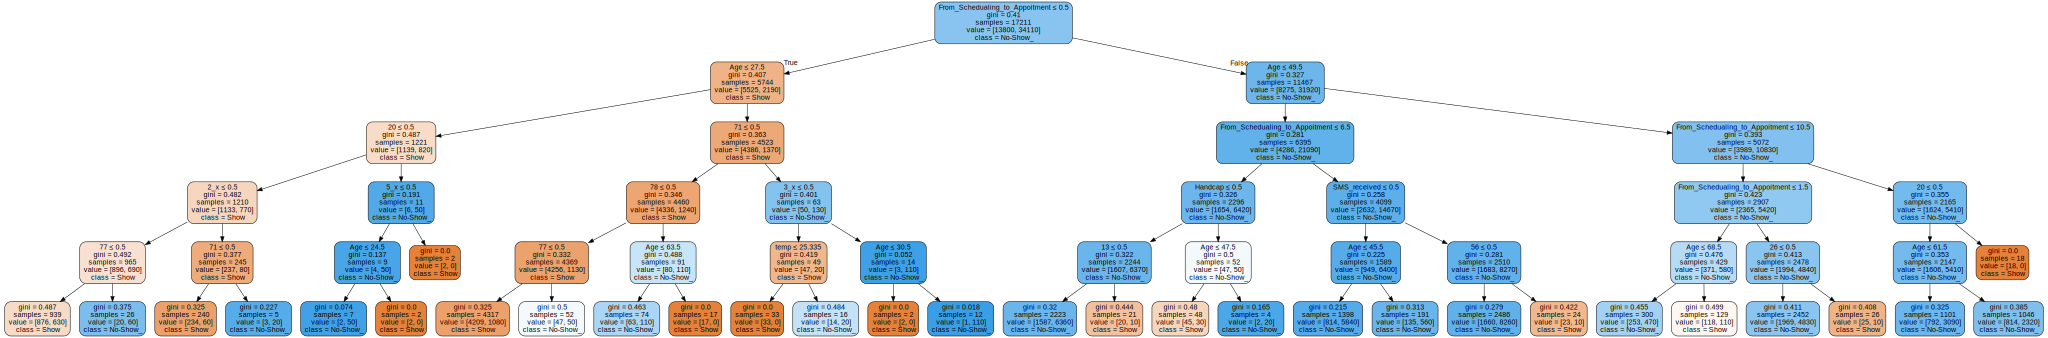

In [151]:
dot_data = export_graphviz(tree_clf, out_file = None, 
                           feature_names = [
                                  'Age',                        'Gender_',
       'From_Schedualing_to_Appoitment',                           'prcp',
                                 'temp',                    'Scholarship',
                         'Hipertension',                       'Diabetes',
                           'Alcoholism',                        'Handcap',
                         'SMS_received',                       
                                  '2_x',                            '3_x',
                                  '4_x',                            '5_x',
                                  '6_x',                            '7_x',
                                      1,                            '2_y',
                                  '3_y',                            '4_y',
                                  '5_y',                            '6_y',
                                  '7_y',                                8,
                                      9,                               10,
                                     11,                               12,
                                     13,                               14,
                                     15,                               16,
                                     17,                               18,
                                     19,                               20,
                                     21,                               22,
                                     23,                               24,
                                     25,                               26,
                                     27,                               28,
                                     29,                               30,
                                     31,                               32,
                                     33,                               34,
                                     35,                               36,
                                     37,                               38,
                                     39,                               40,
                                     41,                               42,
                                     43,                               44,
                                     45,                               46,
                                     47,                               48,
                                     49,                               50,
                                     51,                               53,
                                     54,                               55,
                                     56,                               57,
                                     58,                               59,
                                     60,                               61,
                                     62,                               63,
                                     64,                               65,
                                     66,                               67,
                                     68,                               69,
                                     70,                               71,
                                     72,                               73,
                                     74,                               75,
                                     76,                               77,
                                     78,                               79,
                                     80,                               81], 
                           class_names = ["Show", "No-Show_"],
                           rounded = True, filled=True, special_characters=True)
graph = graphviz.Source(dot_data) 
graph 

In [332]:
y_test_predict = tree_clf.predict (X_test)

In [333]:
conf_matrix = confusion_matrix(y_test, y_test_predict)
conf_matrix

array([[5079, 8721],
       [ 348, 3063]], dtype=int64)

In [334]:
print("The recall for the large tree is ",recall_score(y_test, y_test_predict))  #large tree
print("The precision for the large tree is ",precision_score(y_test, y_test_predict))  #large tree

The recall for the large tree is  0.8979771328056289
The precision for the large tree is  0.259928716904277


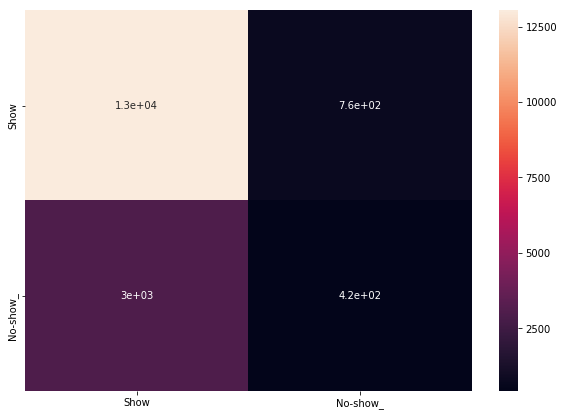

In [79]:
df_cm = pd.DataFrame(conf_matrix, index = [i for i in ["Show","No-show_"]],
                  columns = [i for i in ["Show","No-show_"]])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

### end big tree

In [ ]:
#tree_clf.predict_proba([[18,1]])

In [ ]:
#tree_clf_large = DecisionTreeClassifier (max_depth = 2)
#tree_clf_large.fit (X, y)

In [ ]:
#dot_data = export_graphviz(tree_clf_large, out_file = None, 
                           feature_names = list(X), 
                           class_names = ["Show", "No-Show_" ],
                           rounded = True, filled=True, special_characters=True )
graph = graphviz.Source(dot_data ) 
graph

#### 3.3 Select a threshold per recall and precision

The comand we used before "tree_clf.predict_proba([[0.9,3]])" gives us probability that the result will be 1 or 0. We can define that the predicted result is 1, if the probability to 1 is above a threshold. The default threshold is 0.5. A higher threshold means that we will get results that we are more confident in and precision will rise, but recall will drop.

In [80]:
y_test_proba = tree_clf.predict_proba(X_test)
y_test_proba[:,1]

array([0.13186813, 0.01381999, 0.3877551 , ..., 0.22819594, 0.20111732,
       0.03167499])

In [343]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_true = y_test, probas_pred = y_test_proba[:,1])
print(" Precision = ", precisions, "\n", "Recalls = ", recalls, "\n", "Thresholds = ", thresholds)

 Precision =  [0.19818721 0.20333918 0.20488956 0.20635655 0.20711158 0.2090142
 0.2090702  0.2092384  0.21649843 0.21731226 0.21821124 0.26308039
 0.26324001 0.26808322 0.2748426  0.27504338 0.27510279 0.27748546
 0.27745451 0.27813281 0.27832375 0.27828264 0.27827781 0.27857276
 0.2787907  0.27899832 0.27925829 0.27906326 0.27949438 0.279584
 0.27976749 0.2807947  0.28073829 0.28105752 0.2813093  0.28164858
 0.28151821 0.28186766 0.28193117 0.28185217 0.28190622 0.28191746
 0.28197197 0.28180058 0.28187984 0.28156947 0.28163385 0.28246529
 0.28511808 0.2851471  0.28520517 0.28523387 0.29772881 0.29778378
 0.29826353 0.29802759 0.29828571 0.29852126 0.29859025 0.2990041
 0.30247358 0.30272804 0.30283722 0.30512056 0.3060253  0.31278296
 0.31873622 0.32257073 0.32333849 0.32373432 0.32473185 0.32495315
 0.3282812  0.32873824 0.32921878 0.33185623 0.33787129 0.34171322
 0.34370873 0.34790348 0.34835494 0.3484511  0.35093299 0.35255995
 0.35257242 0.35818399 0.36297689 0.36204986 0.37118

In [190]:
from sklearn.metrics import roc_curve

In [191]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba[:,1])

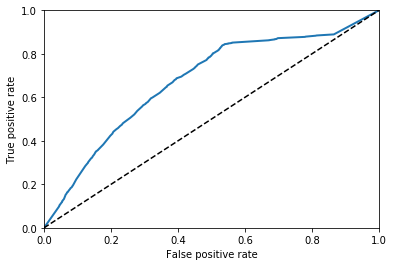

In [192]:
def plot_roc_curve (fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0,1], [0,1], "k--")
    plt.axis([0,1,0,1])
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    
plot_roc_curve (fpr, tpr, "tree")
plt.show()

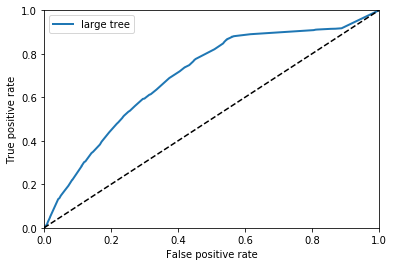

In [278]:
y_test_proba = tree_clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba[:,1])
plot_roc_curve (fpr, tpr, "large tree")
plt.legend(loc = "best")
plt.show()

In [194]:
from sklearn.metrics import roc_auc_score
print("AUC for random guess is:   ", 0.5 )
print("AUC for the large tree is: ", roc_auc_score(y_test, y_test_proba[:,1]) )

AUC for random guess is:    0.5
AUC for the large tree is:  0.6740121367782834


#### Random forest (RF)


In [349]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier( n_estimators=150,max_depth = 15, class_weight={0:2,1:12})
rnd_clf.fit (X, y)
y_pred_rf = rnd_clf.predict(X_test)

In [350]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)
conf_matrix

array([[5717, 8083],
       [ 241, 3170]], dtype=int64)

In [351]:
precision_score(y_test, y_pred_rf)

0.281702657069226

In [352]:
recall_score(y_test, y_pred_rf)

0.9293462327763119

SyntaxError: unexpected EOF while parsing (<ipython-input-304-273f930b34ac>, line 11)

In [217]:
from sklearn import ensemble

clf_gb = ensemble.GradientBoostingClassifier()
clf_gb.fit(X_test, y_test)
y_pred_gb = clf_gb.predict(X_test)
confusion_matrix(y_test, y_pred_gb)

NameError: name 'y2_test_proba' is not defined

# Regression